In [4]:
import sys
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Add the correct relative path to the scripts folder
sys.path.append(os.path.abspath('../scripts'))
sys.path.append(os.path.abspath('../notebooks'))
sys.path.append(os.path.abspath('../src'))


In [21]:
import cleaned_data_from_db

In [6]:
df = cleaned_data_from_db.df

In [7]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,241538.000000,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,241538.000000,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,241538.000000,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,241538.000000,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,241538.000000,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,81230.000000,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,97970.000000,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,98249.000000,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,97910.000000,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [8]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [9]:
# Calculate Total Traffic (DL + UL)
df['Total_Traffic'] = df['Total UL (Bytes)'] + df['Total DL (Bytes)']

# Summarize data for each user
aggregated_data = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'sum',
    'Dur. (ms)': 'sum',
    'Total_Traffic': 'sum'
}).reset_index()

# Display the aggregated data
print(aggregated_data)

        MSISDN/Number     Bearer Id     Dur. (ms)  Total_Traffic
0        3.360100e+10  1.311448e+19  1.167200e+05   8.786906e+08
1        3.360100e+10  7.349883e+18  1.812300e+05   1.568596e+08
2        3.360100e+10  7.349883e+18  1.349690e+05   5.959665e+08
3        3.360101e+10  1.304243e+19  4.987800e+04   4.223207e+08
4        3.360101e+10  1.462771e+19  3.710400e+04   1.457411e+09
...               ...           ...           ...            ...
106850   3.378998e+10  2.615691e+19  2.103890e+05   1.094693e+09
106851   3.379000e+10  1.304243e+19  8.810000e+03   7.146416e+08
106852   3.379000e+10  1.311448e+19  1.409880e+05   4.803073e+08
106853   4.188282e+10  9.637368e+21  7.049061e+07   5.317447e+11
106854   3.197021e+12  7.277826e+18  2.415380e+05   2.321240e+08

[106855 rows x 4 columns]


In [10]:
aggregated_data

,MSISDN/Number,Bearer Id,Dur. (ms),Total_Traffic
0,3.360100e+10,1.311448e+19,1.167200e+05,8.786906e+08
1,3.360100e+10,7.349883e+18,1.812300e+05,1.568596e+08
2,3.360100e+10,7.349883e+18,1.349690e+05,5.959665e+08
3,3.360101e+10,1.304243e+19,4.987800e+04,4.223207e+08
4,3.360101e+10,1.462771e+19,3.710400e+04,1.457411e+09
...,...,...,...,...
106850,3.378998e+10,2.615691e+19,2.103890e+05,1.094693e+09
106851,3.379000e+10,1.304243e+19,8.810000e+03,7.146416e+08
106852,3.379000e+10,1.311448e+19,1.409880e+05,4.803073e+08
106853,4.188282e+10,9.637368e+21,7.049061e+07,5.317447e+11


In [11]:
# Save as CSV
aggregated_data.to_csv('aggregated_data.csv', index=False)

In [12]:

# Normalizing the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(aggregated_data[['Bearer Id', 'Dur. (ms)', 'Total_Traffic']])

# Convert back to DataFrame for easier handling
normalized_df = pd.DataFrame(normalized_data, columns=['Normalized_Sessions', 'Normalized_Duration', 'Normalized_Traffic'])
normalized_df['Total_Traffic'] = aggregated_data['MSISDN/Number']
print(normalized_df)


        Normalized_Sessions  Normalized_Duration  Normalized_Traffic  \
0                  0.000643             0.001555            0.001590   
1                  0.000045             0.002470            0.000232   
2                  0.000045             0.001814            0.001058   
3                  0.000636             0.000606            0.000732   
4                  0.000801             0.000425            0.002678   
...                     ...                  ...                 ...   
106850             0.001998             0.002884            0.001996   
106851             0.000636             0.000024            0.001282   
106852             0.000643             0.001899            0.000841   
106853             1.000000             1.000000            1.000000   
106854             0.000037             0.003326            0.000374   

        Total_Traffic  
0        3.360100e+10  
1        3.360100e+10  
2        3.360100e+10  
3        3.360101e+10  
4        3.3601

In [13]:
from sklearn.cluster import KMeans

# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_data)

# Add cluster labels to the dataframe
aggregated_data['Cluster'] = clusters

# Display the clustered data
print(aggregated_data)


        MSISDN/Number     Bearer Id     Dur. (ms)  Total_Traffic  Cluster
0        3.360100e+10  1.311448e+19  1.167200e+05   8.786906e+08        0
1        3.360100e+10  7.349883e+18  1.812300e+05   1.568596e+08        0
2        3.360100e+10  7.349883e+18  1.349690e+05   5.959665e+08        0
3        3.360101e+10  1.304243e+19  4.987800e+04   4.223207e+08        0
4        3.360101e+10  1.462771e+19  3.710400e+04   1.457411e+09        0
...               ...           ...           ...            ...      ...
106850   3.378998e+10  2.615691e+19  2.103890e+05   1.094693e+09        0
106851   3.379000e+10  1.304243e+19  8.810000e+03   7.146416e+08        0
106852   3.379000e+10  1.311448e+19  1.409880e+05   4.803073e+08        0
106853   4.188282e+10  9.637368e+21  7.049061e+07   5.317447e+11        1
106854   3.197021e+12  7.277826e+18  2.415380e+05   2.321240e+08        0

[106855 rows x 5 columns]


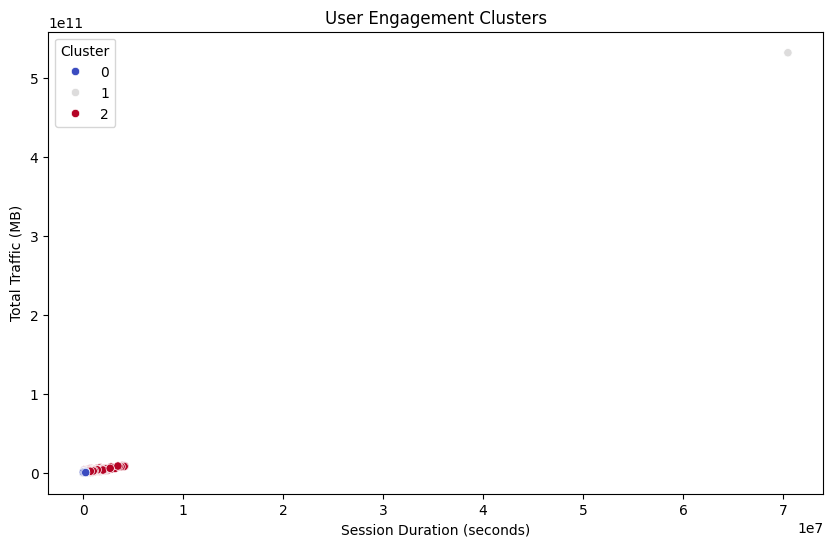

            Bearer Id                                               Dur. (ms)  \
                  min           max          mean           sum           min   
Cluster                                                                         
0        6.917538e+18  5.245793e+19  1.172397e+19  1.130320e+24  7.142000e+03   
1        9.637368e+21  9.637368e+21  9.637368e+21  9.637368e+21  7.049061e+07   
2        1.304243e+19  2.217933e+20  3.647266e+19  3.808840e+23  8.555400e+04   

                                                  Total_Traffic                \
                  max          mean           sum           min           max   
Cluster                                                                         
0        3.502910e+05  1.105163e+05  1.065499e+10  3.324901e+07  3.161341e+09   
1        7.049061e+07  7.049061e+07  7.049061e+07  5.317447e+11  5.317447e+11   
2        4.142855e+06  4.197799e+05  4.383762e+09  1.613794e+08  8.846226e+09   

                          

In [14]:


# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dur. (ms)', y='Total_Traffic', hue='Cluster', data=aggregated_data, palette='coolwarm')
plt.title('User Engagement Clusters')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Total Traffic (MB)')
plt.show()

# Group by Cluster and analyze metrics
cluster_analysis = aggregated_data.groupby('Cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total_Traffic': ['min', 'max', 'mean', 'sum']
})

print(cluster_analysis)


In [15]:
df['Total_social_media'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Total_google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Total_email'] = df['Email DL (Bytes)'] + df['Email DL (Bytes)']
df['Total_youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']

df['Total_Netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']


df['Total_Gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
#df['Total_other'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']



In [16]:
df_new= df[['MSISDN/Number','Total_social_media','Total_google','Total_email','Total_youtube','Total_Netflix','Total_Gaming']]

In [17]:
df_new

,MSISDN/Number,Total_social_media,Total_google,Total_email,Total_youtube,Total_Netflix,Total_Gaming
0,3.366496e+10,1.570185e+06,2.905912e+06,7.127084e+06,1.835594e+07,1.785519e+07,2.924265e+08
1,3.368185e+10,1.933278e+06,4.414096e+06,1.258092e+06,3.935912e+07,3.556554e+07,6.099208e+08
2,3.376063e+10,1.726277e+06,1.022912e+07,5.380302e+06,3.442524e+07,2.375120e+07,2.299803e+08
3,3.375034e+10,6.574930e+05,1.181176e+07,2.879508e+06,3.653476e+07,1.509259e+07,8.103879e+08
4,3.369980e+10,9.127880e+05,7.748843e+06,3.872992e+06,3.422225e+07,1.753980e+07,5.312370e+08
...,...,...,...,...,...,...,...
149996,3.365069e+10,3.517065e+06,1.278491e+07,1.152780e+05,2.795510e+07,3.756186e+07,5.358069e+08
149997,3.366345e+10,2.352181e+06,4.415361e+06,3.908828e+06,2.216552e+07,4.064329e+07,6.316281e+08
149998,3.362189e+10,1.260239e+06,6.585469e+06,3.051468e+06,2.451641e+07,1.502970e+07,5.669338e+08
149999,3.361962e+10,8.231090e+05,7.757267e+06,4.456540e+06,1.712251e+07,1.649484e+07,3.550664e+08


In [18]:
# Rank users by data usage for each application
top_10_social_media = df_new[['MSISDN/Number', 'Total_social_media']].sort_values(by='Total_social_media', ascending=False).head(10)
top_10_youtube = df[['MSISDN/Number', 'Total_youtube']].sort_values(by='Total_youtube', ascending=False).head(10)
top_10_netflix = df[['MSISDN/Number', 'Total_Netflix']].sort_values(by='Total_Netflix', ascending=False).head(10)
top_10_google = df[['MSISDN/Number', 'Total_google']].sort_values(by='Total_google', ascending=False).head(10)
top_10_email = df[['MSISDN/Number', 'Total_email']].sort_values(by='Total_email', ascending=False).head(10)
top_10_gaming = df[['MSISDN/Number', 'Total_Gaming']].sort_values(by='Total_Gaming', ascending=False).head(10)



df[['MSISDN/Number','Total_social_media','Total_google','Total_email','Total_youtube','Total_Netflix','Total_Gaming']]

# Display top 10 most engaged users for each application
print("Top 10 Users for Social Media:")
print(top_10_social_media)

print("\nTop 10 Users for YouTube:")
print(top_10_youtube)

print("\nTop 10 Users for Netflix:")
print(top_10_netflix)

print("\nTop 10 Users for google:")
print(top_10_google)

print("\nTop 10 Users for email:")
print(top_10_email)

Top 10 Users for Social Media:
        MSISDN/Number  Total_social_media
32231    3.366178e+10           3650861.0
105244   3.375024e+10           3650240.0
147105   3.365205e+10           3648814.0
50260    3.365856e+10           3648729.0
98116    3.361008e+10           3648659.0
31921    3.366264e+10           3648092.0
45514    3.376091e+10           3648027.0
11172    3.366237e+10           3647700.0
9965     3.364551e+10           3647486.0
7440     3.366887e+10           3647484.0

Top 10 Users for YouTube:
        MSISDN/Number  Total_youtube
66497    3.368757e+10     45190078.0
102100   3.366957e+10     45179008.0
15654    3.366407e+10     45170035.0
107607   3.366319e+10     45162724.0
135104   3.367443e+10     45158398.0
118058   3.376144e+10     45110515.0
45408    3.366740e+10     45108826.0
134565   3.360573e+10     45104757.0
13822    3.366455e+10     45093369.0
68232    3.366295e+10     45091533.0

Top 10 Users for Netflix:
        MSISDN/Number  Total_Netflix
60145    

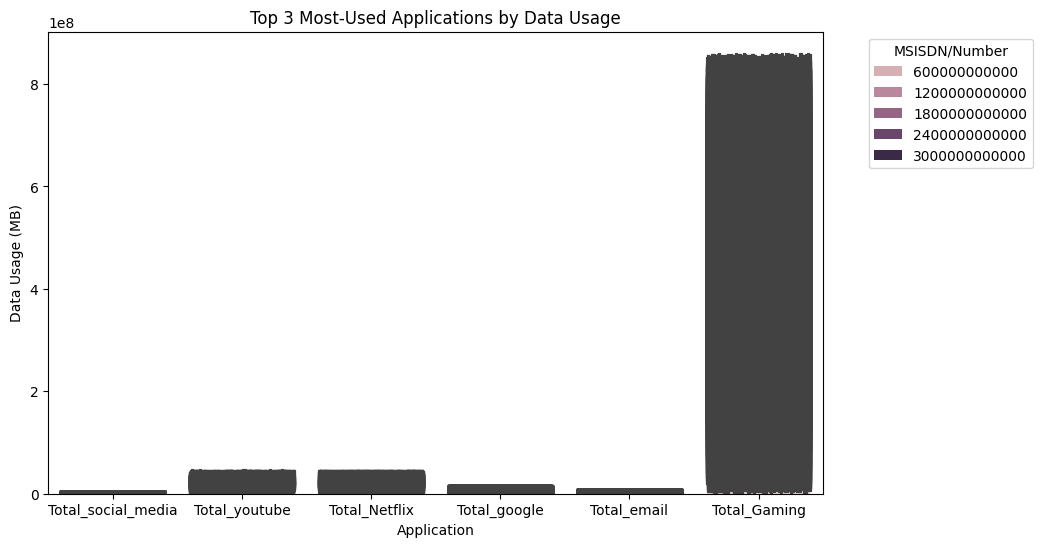

In [20]:

# Prepare data for visualization
top_3_apps = df_new[['MSISDN/Number','Total_social_media', 'Total_youtube', 'Total_Netflix','Total_google' ,'Total_email','Total_Gaming']].melt(id_vars=['MSISDN/Number'], 
                                    value_vars=['Total_social_media', 'Total_youtube', 'Total_Netflix','Total_google' ,'Total_email','Total_Gaming'], 
                                    var_name='Application', value_name='Data_Usage')

# Plot the top 3 applications
plt.figure(figsize=(10, 6))
sns.barplot(x='Application', y='Data_Usage', hue='MSISDN/Number', data=top_3_apps)
plt.title('Top 3 Most-Used Applications by Data Usage')
plt.xlabel('Application')
plt.ylabel('Data Usage (MB)')
plt.legend(title='MSISDN/Number', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
